In [1]:
import sys
sys.path.append("E:/JN/Machine Learning/SMS spam classifier")


In [2]:
import numpy as np
import pandas as pd

In [3]:
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
df = pd.read_csv('spam.csv', encoding=result['encoding'])

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
52,ham,K fyi x has a ride early tomorrow morning but ...,NaN,NaN,NaN
1923,ham,Hello. They are going to the village pub at 8 ...,NaN,NaN,NaN
88,ham,I'm really not up to it still tonight babe,NaN,NaN,NaN
4815,ham,Anything is valuable in only 2 situations: Fir...,NaN,NaN,NaN
3654,ham,Senthil group company Apnt 5pm.,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#1 Data Cleaning
#2 EDA
#3 Text Preporcessing 
#4 Modeal Building
#5 Evaluation
#6 Improvement
#7 Website
#8 Deployment

##1. Data Cleaning

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
2942,ham,No message..no responce..what happend?
3366,ham,Hey what are you doing. Y no reply pa..
5364,spam,Call 09095350301 and send our girls into eroti...
2539,ham,Hmmm:)how many players selected?
530,spam,PRIVATE! Your 2003 Account Statement for 07815...


In [10]:
# renaming the columns
df.rename(columns={'v1' : 'target','v2' : 'text'},inplace=True)
df.sample(5)

,target,text
3686,ham,Great! I shoot big loads so get ready!
4791,ham,Gd luck 4 ur exams :-)
2435,ham,Oh ya ya. I remember da. .
5089,ham,What type of stuff do you sing?
398,ham,"Good evening Sir, Al Salam Wahleykkum.sharing ..."


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing value
df.isnull().sum()


target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

2. EDA

In [19]:
 # EDA (Exploratory Data Ananlysis) is performend in classification in ML where we try to read the data or analyze the data. 
# In this data we dont have much columns(only 2 ) so cant do much EDA
# what percent is Spam AND what percent is Ham

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

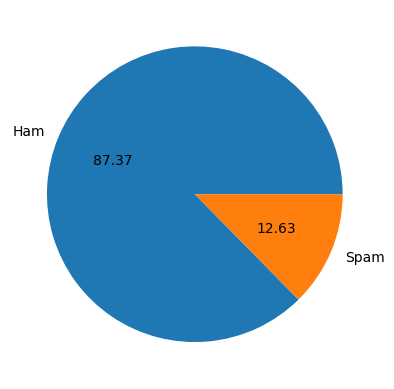

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

In [23]:
# Data is Imbalanced

In [24]:
#natural language toolkit
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters']=df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words
df['num_words']=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
# num of Sentences
df['num_sentences']=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()  
#for ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#for spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()  

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [35]:
# form above data we could see that spam msg are bigger in length than ham

In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

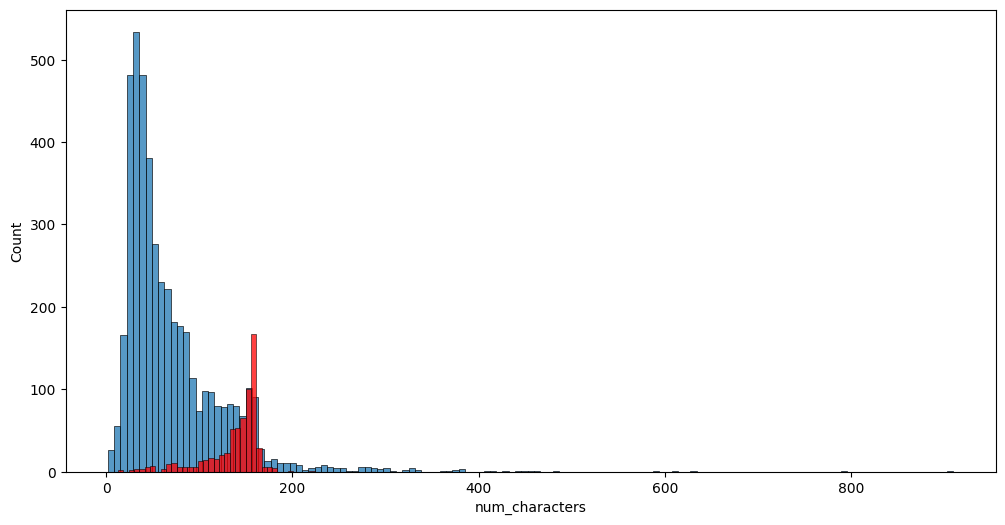

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

In [38]:
#in above plot spam has higher characters as compared to ham

<Axes: xlabel='num_words', ylabel='Count'>

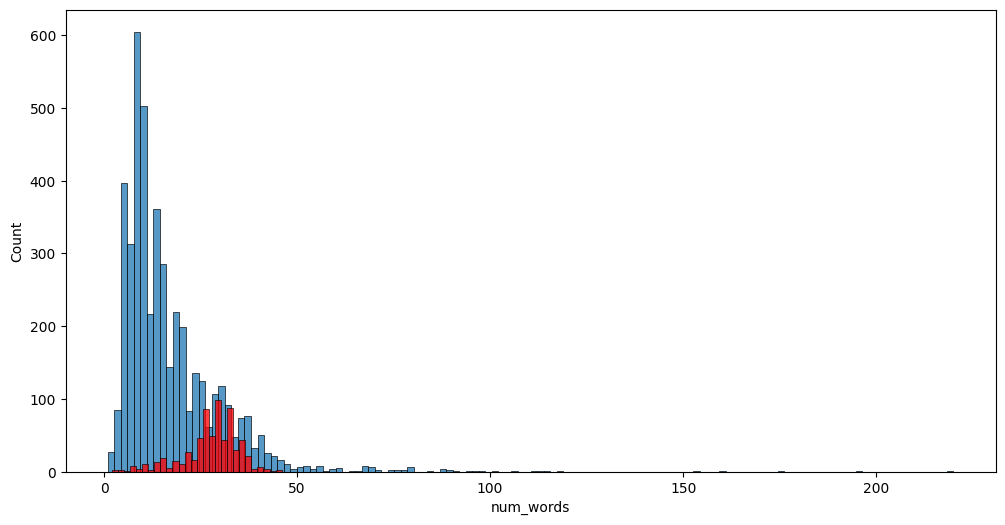

In [39]:
#for num words also we can see
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

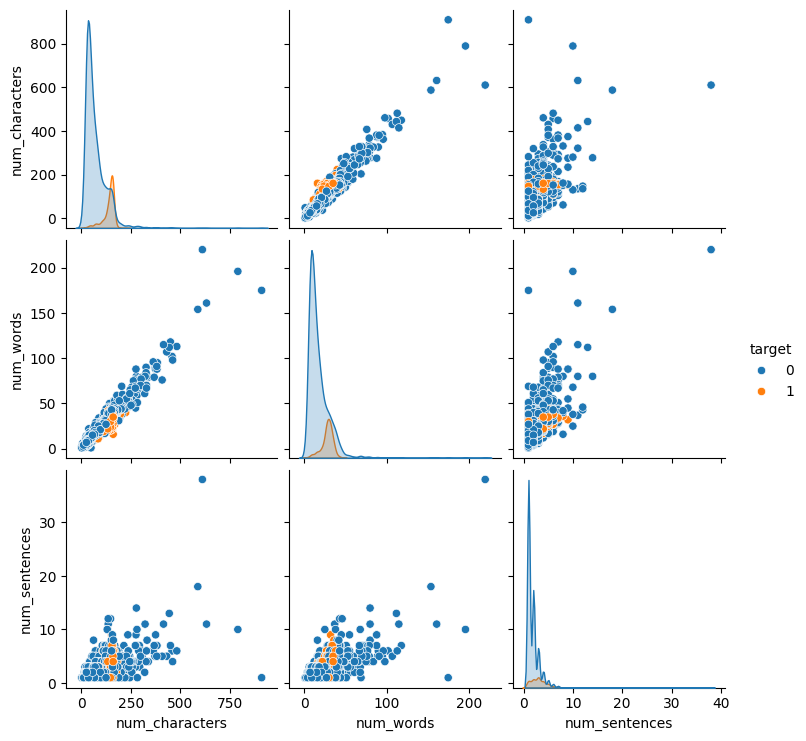

In [40]:
sns.pairplot(df,hue='target')

In [41]:
df.dtypes

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

In [42]:
# Here df.corr() was used but not able to use so used this below code form chatgpt 
# NO PROBLEM
numeric_columns = df.select_dtypes(include=['int64','int32'])
numeric_columns.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

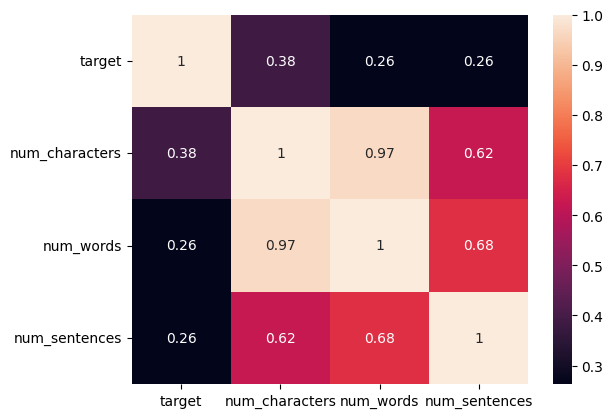

In [43]:
sns.heatmap(numeric_columns.corr(),annot=True)

3. Data Preprocessing
    Lower Case
    Tokenization -- Breaking into words
    Removing Special Characters
    Removing Stop Words and Punctuation -- like is am etc which does not have meaning but used in sentence formation
    Stemming -- same types of words(dance , dancing ) are converted to one word let say dance

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [45]:
 # transform_text('I Loved the YT lectures on Machine Learning. How About you ?') show error when run in all no problem just run below code one by one and the will run

In [46]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santosh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

NameError: name 'ps' is not defined

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [50]:
df['transformed_text']=df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
# creating WordCloud 
# Wordcloud will make or show the most important words in bigger or give priority


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


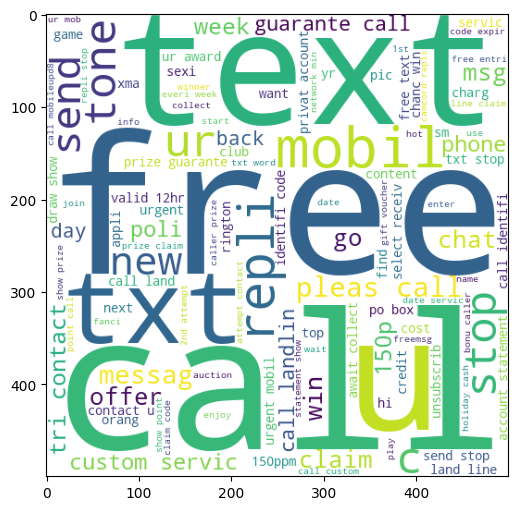

In [56]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) 

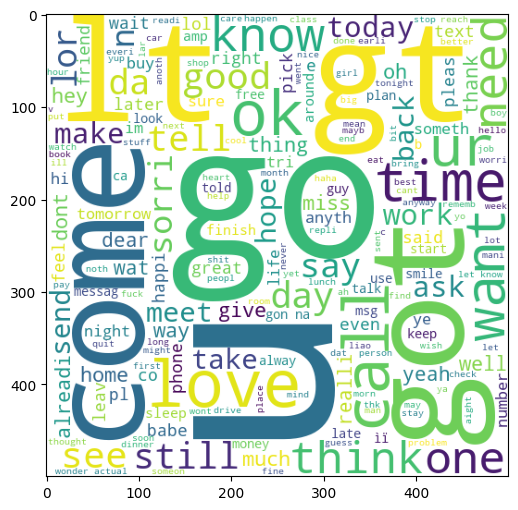

In [58]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
print(df.columns)


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [61]:
# form here (to some point below) there is some error which has to be fixed . here we performed eda so will not do actual problkem in overall project

In [62]:
'''spam_corpus= []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)'''


"spam_corpus= []\nfor msg in df[df['target'] == 1]['transformed_text'].tolist():\n    for word in msg.split():\n        spam_corpus.append(word)"

In [63]:
'''len(spam_corpus)'''

'len(spam_corpus)'

In [64]:
'''from collections import Counter
trial_var1=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
trial_var2=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(trial_var1=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],trial_var2=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()'''

"from collections import Counter\ntrial_var1=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]\ntrial_var2=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]\nsns.barplot(trial_var1=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],trial_var2=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])\nplt.xticks(rotation='vertical')\nplt.show()"

In [65]:
'''print(df.columns)
'''

'print(df.columns)\n'

In [66]:
'''ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
'''

"ham_corpus = []\nfor msg in df[df['target'] == 0]['transformed_text'].tolist():\n    for word in msg.split():\n        ham_corpus.append(word)\n"

In [67]:
'''len(ham_corpus)'''

'len(ham_corpus)'

In [68]:
'''word_counter = Counter(ham_corpus)
df = pd.DataFrame(word_counter.most_common(30))
print(df)
sns.barplot(x=df[0], y=df[1])'''

'word_counter = Counter(ham_corpus)\ndf = pd.DataFrame(word_counter.most_common(30))\nprint(df)\nsns.barplot(x=df[0], y=df[1])'

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [70]:
#to here

4. Model Building

In [71]:
# Naive based (becoz in textual based ml naive performs very well) some more algo will be used later on

In [72]:
# text to words (bag of words = frequency)  Data will be vectorised

In [73]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer # both bag of words and tfidf trying to use
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=1000)

In [74]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [75]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)'''


'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX = scaler.fit_transform(X)'

In [76]:
 #appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [77]:
X.shape

(5169, 1000)

In [78]:
y = df['target'].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score 

In [83]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [84]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7804642166344294
[[687 209]
 [ 18 120]]
0.364741641337386


In [85]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
''' here in tfidf precison is 1
output looks like 
0.9593810444874274
[[896   0]
 [ 42  96]]
1.0 
'''

0.9777562862669246
[[895   1]
 [ 22 116]]
0.9914529914529915


' here in tfidf precison is 1\noutput looks like \n0.9593810444874274\n[[896   0]\n [ 42  96]]\n1.0 \n'

In [86]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[893   3]
 [ 14 124]]
0.9763779527559056


In [87]:
''' since precision score matters more in this case so we will go with tfidf in multinomial niave base accuracy is less '''

' since precision score matters more in this case so we will go with tfidf in multinomial niave base accuracy is less '

In [88]:
# we will import more ml models and compare it with mnb tfidf

In [89]:
# model improvement
#1 . change the max_features parameter of tfidf

In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))